In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = 0
m = 0
Emax = 0
V = 0
W = 0
b = 0
e = 0
E = 0

In [3]:
# И Л Ь Я Р О С А В М
letters = {
    'И': [
         1, -1, -1, -1,  1,
         1, -1, -1,  1,  1,
         1, -1,  1, -1,  1,
         1,  1, -1, -1,  1,
         1, -1, -1, -1,  1
    ],
    'Л': [
        -1, -1,  1, -1, -1,
        -1,  1, -1,  1, -1,
        -1,  1, -1,  1, -1,
        -1,  1, -1,  1, -1,
         1, -1, -1,  1, -1
    ],
    'Ь': [
        -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1,
        -1,  1,  1, -1, -1,
        -1,  1, -1,  1, -1,
        -1,  1,  1, -1, -1
    ],
    'Я': [
        -1,  -1, -1,  1, 1,
        -1,  -1,  1, -1, 1,
        -1,  -1, -1,  1, 1,
        -1,  -1,  1, -1, 1,
         -1,  1, -1, -1, 1
    ],
    'Р': [
        -1,  1,  1,  1, -1,
        -1,  1, -1,  1, -1,
        -1,  1,  1,  1, -1,
        -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1
    ],
    'О': [
        -1, -1,  1, -1, -1,
        -1,  1, -1,  1, -1,
        -1,  1, -1,  1, -1,
        -1,  1, -1,  1, -1,
        -1, -1,  1, -1, -1
    ],
    'С': [
        -1,  1,  1,  1, -1,
         1, -1, -1, -1,  1,
         1, -1, -1, -1, -1,
         1, -1, -1, -1,  1,
        -1,  1,  1,  1, -1
    ],
    'А': [
        -1, -1,  1, -1, -1,
        -1,  1, -1,  1, -1,
        -1,  1, -1,  1, -1,
        -1,  1,  1,  1, -1,
        -1,  1, -1,  1, -1
    ],
    'В': [
        -1,  1,  1,  1, -1,
        -1,  1, -1,  1, -1,
        -1,  1,  1,  1,  1,
        -1,  1, -1, -1,  1,
        -1,  1,  1,  1,  1
    ],
    'М': [
         1, -1, -1, -1,  1,
         1,  1, -1,  1,  1,
         1, -1,  1, -1,  1,
         1, -1, -1, -1,  1,
         1, -1, -1, -1,  1
    ]
}

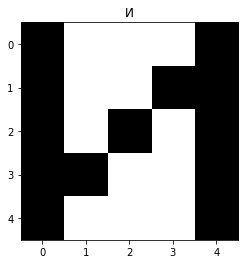

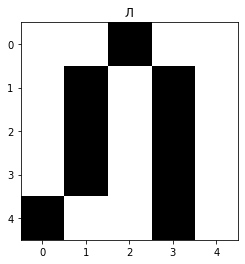

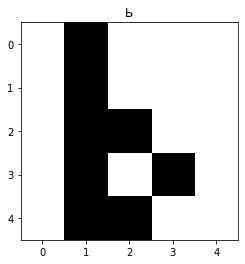

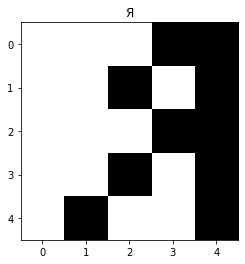

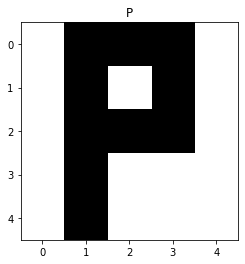

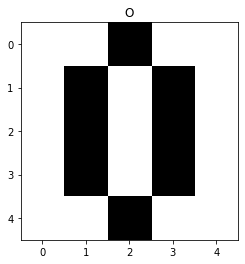

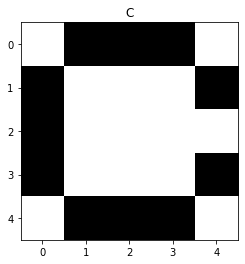

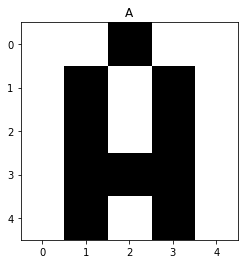

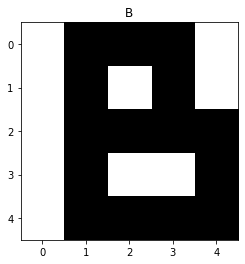

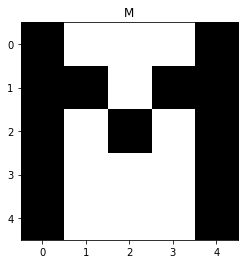

In [4]:
for letter, img in letters.items():
    plt.imshow(np.array(img).reshape((5, 5)) * -1, cmap='gray', vmin=-1, vmax=1)
    plt.title(letter)
    plt.show()

In [5]:
references_amount = 10
size = 25
norm = 0.1

In [6]:
def init(references_amount, size, norm):
    global s, m, Emax # эти глобалы нужны чтобы одна функция видела переменные из другой свободно
    s = references_amount # Количество эталонов букв
    m = size # Размер вектора одного изображения
    Emax = norm # Среднее значение ошибки

In [7]:
def fit(refs):
    global V, W, b, e, E
    V = np.array(refs).reshape(s, m) #эталон
    W = 0.5*V # матрица весов 1 слоя
    b = m/2 # смещение (bias)
    e = 1/s # вес отрицательных связей
    
    E = np.ndarray((s, s)) # матрица обратных связей, главная диагональ заполнена 1, а остальное -1
    E.fill(-1*e)
    np.fill_diagonal(E, 1)

In [8]:
def maxnet(arr):
    global E, Emax
    q_p = np.copy(arr) # p - positive, n - negative, типо n - ошибка
    q_n = np.dot(E, q_p) # скалярное произведение 
    q_n = np.where(q_n < 0, 0, q_n) # заменяем отрицательные значения на 0
    while (np.linalg.norm(q_n-q_p)>Emax): # пока ошибка(не уверен) больше чем среднее значение ошибки, будем понижать ее
        q_p = q_n # меняем местами
        q_n = np.dot(E, q_p) # пересчитываем q_n относительно старой ошибки
        q_n = np.where(q_n < 0, 0, q_n) # заменяем отрицательные значения на 0
    # последний раз делаем эту замену и возвращаем
    q_p = q_n
    q_n = np.dot(E, q_p)
    q_n = np.where(q_n < 0, 0, q_n)
    return q_n

In [9]:
def predict(img):
    global Emax, b, W
    Sin = np.array(img) # просто поданное на вход изображение буквы
    Uz_in = np.dot(W, Sin) + b # это (3) в методичке. скалярное произведение изображения на матрицу весов 1-го слоя + смещение (Скалярное произведение позволяет проецировать входное пространство на пространство обратных связей. Это позволяет нейросети выявлять сложные взаимосвязи и паттерны в данных.)
    Uz_out = Emax * Uz_in # эти выходные сигналы являются входными в MaxNet 
    return maxnet(Uz_out) # 

In [10]:
def colorize_and_matrix(arr):
    output = np.ndarray((10, 5, 5))
    for i in range(arr.shape[0]):
        output[i] = np.where(arr[i]<0, 255, 0).reshape(-1, 5)
    return output

In [11]:
v = np.array(list(letters.values()))
vm = colorize_and_matrix(v)
v = v.reshape(1,-1)[0]

In [15]:
def comp(test):
    answer = predict(test)
    number = np.where(answer > 0)[0][0]
    result = answer[number]
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(1, 2, 1)
    plt.imshow(np.where(test<0, 255, 0).reshape(5,5), cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
    plt.title('Исходное')
    ax = plt.subplot(1, 2, 2)
    plt.imshow(vm[number], cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
    plt.title('Совпадение')
    print('Предполагаемый результат: ', result)

In [16]:
init(references_amount, size, norm)
train(v)
print(predict(letters['А']))

[0.         0.07217871 0.         0.         0.         0.
 0.         0.65679384 0.         0.        ]


Предполагаемый результат:  0.21446076019899996


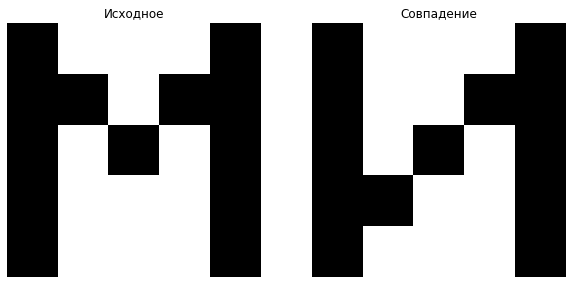

In [17]:
comp(np.array(letters['М']))

In [18]:
v9_noise = np.array([
    -1,  1,  1,  1, -1,
     1, -1, -1, -1,  1,
     1, -1,  1, -1,  1,
     1, -1, -1, -1,  1,
    -1,  1,  1,  1, -1
])

Предполагаемый результат:  1.1583100000000004


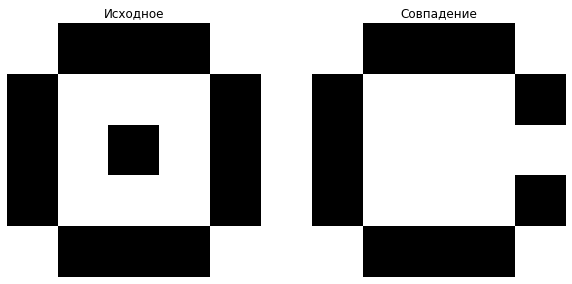

In [19]:
comp(v9_noise)

In [20]:
v3_noise = np.array([
    -1,  -1, -1, -1,  1,
    -1,  -1, -1, -1,  1,
    -1,  -1, -1,  1,  1,
    -1,  -1,  1, -1,  1,
     -1,  1, -1, -1, -1
])

Предполагаемый результат:  1.0319000000000003


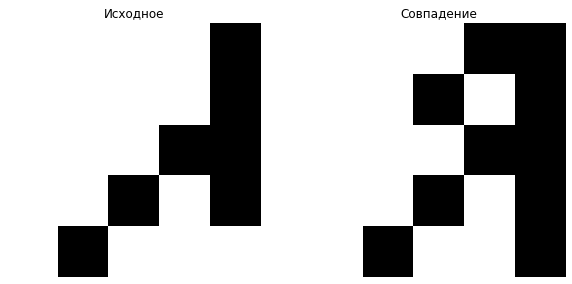

In [21]:
comp(v3_noise)

In [24]:
v1_noise = np.array([
    -1, -1,  1, -1, -1,
    -1,  1,  1,  1, -1,
    -1,  1,  1,  1, -1,
    -1,  1,  1,  1, -1,
    -1,  1,  1,  1, -1
])

Предполагаемый результат:  0.1121416999999999


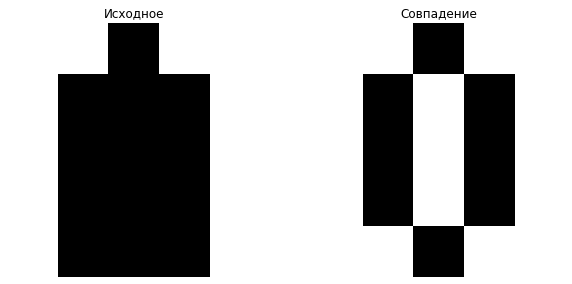

In [25]:
comp(v1_noise)

In [26]:
v_noise = np.array([
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1,
     1,  1,  1,  1,  1
])

Предполагаемый результат:  0.058285999999999706


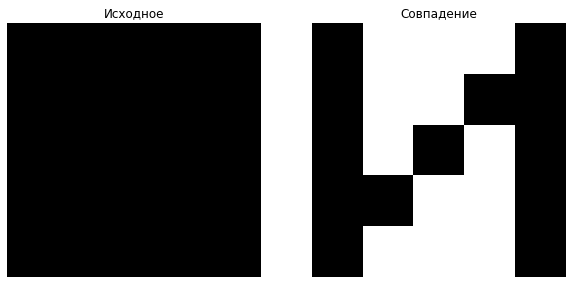

In [27]:
comp(v_noise)

In [28]:
v4_equal = np.array([
    -1, 1,  1,  -1, -1,
    -1,  1, -1,  1, -1,
    -1,  1, -1,  1, -1,
    -1,  1, -1,  1, -1,
     -1, 1, -1, -1, -1
])

[0.         0.         0.         0.         0.11625672 0.11625672
 0.         0.11625672 0.         0.        ]


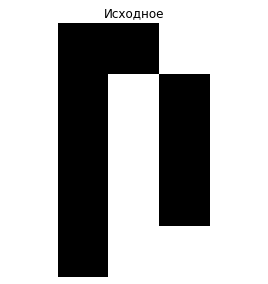

In [29]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(np.where(v4_equal<0, 255, 0).reshape(5,5), cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Исходное')
answer = predict(v4_equal)
print(answer)